In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
import shutil

In [20]:
#2018 projections

# Load the newly uploaded CSV file
csv_path = "enpppsumpop18.csv"
df_population = pd.read_csv(csv_path)

# Drop rows with missing data
df_population.dropna(inplace=True)

# Convert relevant columns to numeric (excluding 'Age Group' and 'Sex')
df_population.iloc[:, 1:-1] = df_population.iloc[:, 1:-1].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values after conversion
df_population.dropna(inplace=True)

# Reshape the data for animation
df_melted = df_population.melt(id_vars=["Age Group", "Sex"], var_name="Year", value_name="Population")

# Convert year to integer
df_melted["Year"] = df_melted["Year"].astype(int)

csv_path = "CleanedPopulationData2018.csv"
df_melted.to_csv(csv_path, index=False)

# Load the cleaned population data
csv_path = "CleanedPopulationData2018.csv"  # Replace with the correct file path
df_population = pd.read_csv(csv_path)

# Filter data for years 2019 to 2060
df_filtered = df_population[(df_population["Year"] >= 2018) & (df_population["Year"] <= 2060)]

# Ensure all age group labels are stripped of whitespace
df_filtered["Age Group"] = df_filtered["Age Group"].str.strip()

# Get unique age groups in order without duplicates
age_groups_unique = list(dict.fromkeys(df_filtered["Age Group"].unique()))
if "100 & over" in age_groups_unique:
    age_groups_unique.remove("100 & over")
age_groups_unique.append("100 & over")  # Ensure "100 & over" is at the end


/var/folders/wm/rntml9cj7270lh5ry0v4gjhc0000gn/T/ipykernel_27537/292514017.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Age Group"] = df_filtered["Age Group"].str.strip()


In [21]:
# Create directory for saving charts
charts_path = "population_pyramids_2018_2060"
os.makedirs(charts_path, exist_ok=True)

# Generate individual charts for each year
for year in sorted(df_filtered["Year"].unique()):
    # Filter data for the current year
    df_year = df_filtered[df_filtered["Year"] == year]
    
    # Separate male and female data
    df_male = df_year[df_year["Sex"] == "Male"].set_index("Age Group")["Population"]
    df_female = df_year[df_year["Sex"] == "Female"].set_index("Age Group")["Population"]
    
    # Ensure both datasets align with the age groups
    df_male = df_male.reindex(age_groups_unique, fill_value=0).astype(float)
    df_female = df_female.reindex(age_groups_unique, fill_value=0).astype(float)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 10))
    
    # Plot bars for both genders
    ax.barh(age_groups_unique, df_male, color="blue", label="Male", alpha=0.7)
    ax.barh(age_groups_unique, -df_female, color="red", label="Female", alpha=0.7)
    
    # Formatting
    ax.set_xlim([-df_female.max() * 1.1, df_male.max() * 1.1])
    ax.set_xlabel("Population (Thousands)")
    ax.set_title(f"2018 ONS Population Projections - Year {year}")
    ax.legend()
    plt.gca().invert_yaxis()  # Invert y-axis to have younger ages at the bottom
    
    # Save chart
    chart_path = os.path.join(charts_path, f"population_pyramid_{year}.png")
    plt.savefig(chart_path)
    plt.close(fig)

# Optionally, compress the charts into a ZIP file for easier sharing
zip_path = f"{charts_path}.zip"
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', charts_path)

print(f"Charts saved in directory: {charts_path}")
print(f"ZIP file created: {zip_path}")

Charts saved in directory: population_pyramids_2018_2060
ZIP file created: population_pyramids_2018_2060.zip


Animation saved as: population_pyramid_animation_2018_2060.mp4


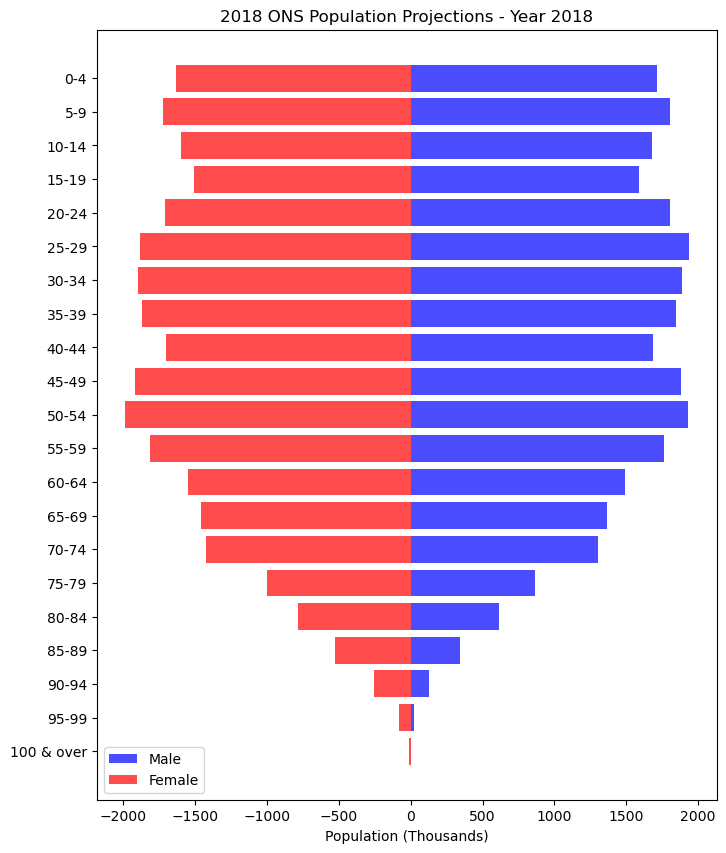

In [22]:
# Generate an animation
fig, ax = plt.subplots(figsize=(8, 10))

def update(year):
    ax.clear()
    
    # Filter data for the current year
    df_year = df_filtered[df_filtered["Year"] == year]
    
    # Separate male and female data
    df_male = df_year[df_year["Sex"] == "Male"].set_index("Age Group")["Population"]
    df_female = df_year[df_year["Sex"] == "Female"].set_index("Age Group")["Population"]
    
    # Ensure both datasets align with the age groups
    df_male = df_male.reindex(age_groups_unique, fill_value=0).astype(float)
    df_female = df_female.reindex(age_groups_unique, fill_value=0).astype(float)
    
    # Plot bars for both genders
    ax.barh(age_groups_unique, df_male, color="blue", label="Male", alpha=0.7)
    ax.barh(age_groups_unique, -df_female, color="red", label="Female", alpha=0.7)
    
    # Formatting
    ax.set_xlim([-df_female.max() * 1.1, df_male.max() * 1.1])
    ax.set_xlabel("Population (Thousands)")
    ax.set_title(f"2018 ONS Population Projections - Year {year}")
    ax.legend()
    plt.gca().invert_yaxis()  # Invert y-axis to have younger ages at the bottom

# Create animation
years = sorted(df_filtered["Year"].unique())
ani = animation.FuncAnimation(fig, update, frames=years, repeat=True, interval=300)

# Save animation as a video file
video_path = "population_pyramid_animation_2018_2060.mp4"
ani.save(video_path, writer="ffmpeg", fps=5)

print(f"Animation saved as: {video_path}")


In [23]:
#2022 projections
# Load the dataset
file_path = "en/en_ppp_machine_readable.xlsx"  # Replace with the correct file path
xls = pd.ExcelFile(file_path)

# Load the "Population_in_age_groups" sheet
df_population_in_age_groups = pd.read_excel(xls, sheet_name="Population_in_age_groups")

# Filter data for years 2022 through 2060
df_filtered = df_population_in_age_groups[["Sex", "Age"] + list(range(2022, 2061))]

# Reshape the data to long format for easier handling
df_melted = df_filtered.melt(id_vars=["Sex", "Age"], var_name="Year", value_name="Population")

# Convert the year column to integer and population column to numeric (in thousands)
df_melted["Year"] = df_melted["Year"].astype(int)
df_melted["Population"] = pd.to_numeric(df_melted["Population"]) / 1000  # Convert to thousands

# Clean up age group labels (e.g., remove extra spaces)
df_melted["Age"] = df_melted["Age"].str.strip()

# Get unique age groups in order without duplicates
age_groups_unique = list(dict.fromkeys(df_melted["Age"].unique()))
if "100 & over" in age_groups_unique:
    age_groups_unique.remove("100 & over")

In [24]:
# Create directory for saving charts
charts_path = "population_pyramids_2022_2060"
os.makedirs(charts_path, exist_ok=True)

# Generate individual charts for each year
years = sorted(df_melted["Year"].unique())

for year in years:
    # Filter data for the current year
    df_year = df_melted[df_melted["Year"] == year]
    
    # Separate male and female data
    df_male = df_year[df_year["Sex"] == "Males"].set_index("Age")["Population"]
    df_female = df_year[df_year["Sex"] == "Females"].set_index("Age")["Population"]
    
    # Ensure both datasets align with the age groups
    df_male = df_male.reindex(age_groups_unique, fill_value=0).astype(float)
    df_female = df_female.reindex(age_groups_unique, fill_value=0).astype(float)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 10))
    
    # Plot bars for both genders
    ax.barh(age_groups_unique, df_male, color="blue", label="Males", alpha=0.7)
    ax.barh(age_groups_unique, -df_female, color="red", label="Females", alpha=0.7)
    
    # Formatting
    ax.set_xlim([-df_female.max() * 1.1, df_male.max() * 1.1])
    ax.set_xlabel("Population (Thousands)")
    ax.set_title(f"2022 ONS Population Projections - Year {year}")
    ax.legend()
    plt.gca().invert_yaxis()  # Invert y-axis to have younger ages at the bottom
    
    # Save chart
    chart_path = os.path.join(charts_path, f"population_pyramid_{year}.png")
    plt.savefig(chart_path)
    plt.close(fig)

# Compress the directory into a zip file for easier sharing
zip_path = f"{charts_path}.zip"
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', charts_path)

print(f"Charts saved in directory: {charts_path}")
print(f"ZIP file created: {zip_path}")

Charts saved in directory: population_pyramids_2022_2060
ZIP file created: population_pyramids_2022_2060.zip


Animation saved as: population_pyramid_animation_2022_2060.mp4


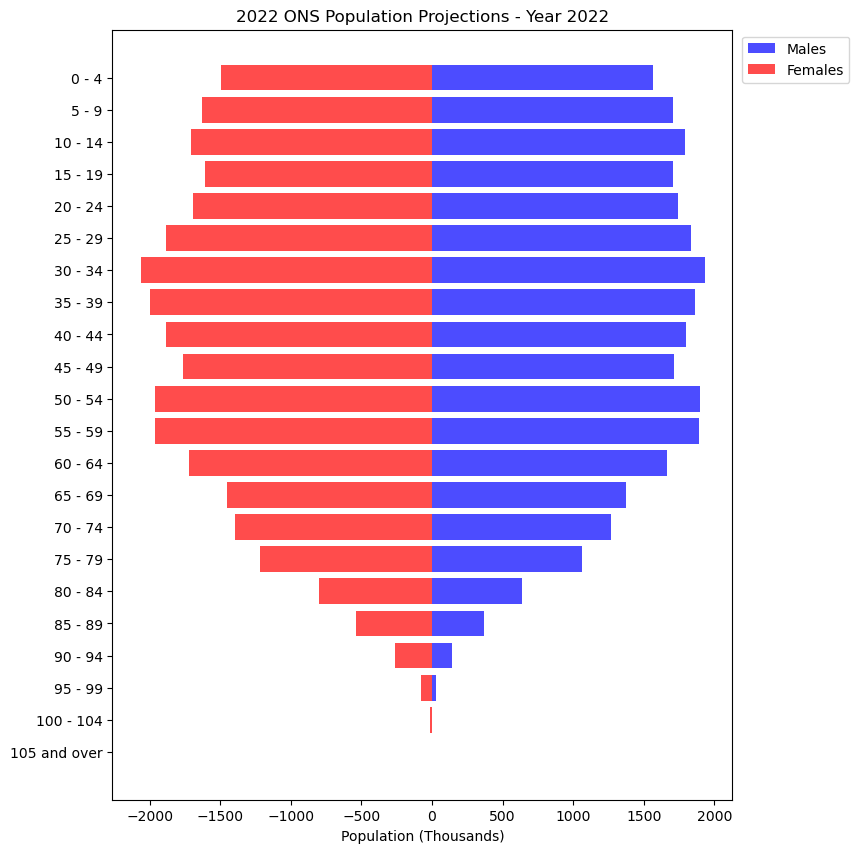

In [45]:
# Prepare the animation figure
fig, ax = plt.subplots(figsize=(8, 10))

# Function to update the plot for each year
def update(year):
    ax.clear()
    
    # Filter data for the current year
    df_year = df_melted[df_melted["Year"] == year]
    
    # Separate male and female data
    df_male = df_year[df_year["Sex"] == "Males"].set_index("Age")["Population"]
    df_female = df_year[df_year["Sex"] == "Females"].set_index("Age")["Population"]
    
    # Ensure both datasets align with the age groups
    df_male = df_male.reindex(age_groups_unique, fill_value=0).astype(float)
    df_female = df_female.reindex(age_groups_unique, fill_value=0).astype(float)
    
    # Plot bars for both genders
    ax.barh(age_groups_unique, df_male, color="blue", label="Males", alpha=0.7)
    ax.barh(age_groups_unique, -df_female, color="red", label="Females", alpha=0.7)
    
    # Formatting
    ax.set_xlim([-df_female.max() * 1.1, df_male.max() * 1.1])
    ax.set_xlabel("Population (Thousands)")
    ax.set_title(f"2022 ONS Population Projections - Year {year}")
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1))  # Legend always on the right
    plt.gca().invert_yaxis()  # Invert y-axis to have younger ages at the bottom

# Create the animation
years = sorted(df_melted["Year"].unique())
ani = animation.FuncAnimation(fig, update, frames=years, repeat=True, interval=300)

# Save the animation as a video file
video_path = "population_pyramid_animation_2022_2060.mp4"
ani.save(video_path, writer="ffmpeg", fps=5)

print(f"Animation saved as: {video_path}")

In [34]:
# Comparing the difference between 2018 and 2022 population projections

# Load the datasets
file_path_2018 = "CleanedPopulationData2018.csv"  # Replace with the correct path
file_path_2022 = "en/en_ppp_machine_readable.xlsx"  # Replace with the correct path

df_population_2018 = pd.read_csv(file_path_2018)
xls_2022 = pd.ExcelFile(file_path_2022)
df_population_2022 = pd.read_excel(xls_2022, sheet_name="Population_in_age_groups")


In [35]:
# Step 1: Filter and clean the 2018 dataset
df_population_2018_filtered = df_population_2018[df_population_2018["Year"].between(2022, 2060)]
df_population_2018_filtered["Population"] = df_population_2018_filtered["Population"] * 1000  # Scale to raw counts
df_population_2018_filtered["Age Group"] = df_population_2018_filtered["Age Group"].str.strip()
df_population_2018_filtered.rename(columns={"Age Group": "Age"}, inplace=True)


/var/folders/wm/rntml9cj7270lh5ry0v4gjhc0000gn/T/ipykernel_27537/4068807215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_2018_filtered["Population"] = df_population_2018_filtered["Population"] * 1000  # Scale to raw counts
/var/folders/wm/rntml9cj7270lh5ry0v4gjhc0000gn/T/ipykernel_27537/4068807215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_2018_filtered["Age Group"] = df_population_2018_filtered["Age Group"].str.strip()
/var/folders/wm/rntml9cj7270lh5ry0v4gjhc0000

In [36]:
# Step 2: Filter and clean the 2022 dataset
df_population_2022_filtered = df_population_2022[["Sex", "Age"] + list(range(2022, 2061))]
df_population_2022_melted = df_population_2022_filtered.melt(
    id_vars=["Sex", "Age"], var_name="Year", value_name="Population"
)
df_population_2022_melted["Year"] = df_population_2022_melted["Year"].astype(int)
df_population_2022_melted["Age"] = df_population_2022_melted["Age"].str.replace(" - ", "-").str.strip()

# Combine "100-104" and "105 and over" into "100 & over" in the 2022 dataset
df_population_2022_melted["Age"] = df_population_2022_melted["Age"].replace({"100-104": "100&over", "105 and over": "100&over"})

# Aggregate the population for the combined "100 & over" group
df_population_2022_melted = (
    df_population_2022_melted.groupby(["Sex", "Age", "Year"], as_index=False)["Population"].sum()
)


In [37]:
# Step 3: Standardize the "Sex" column in both datasets
df_population_2018_filtered["Sex"] = df_population_2018_filtered["Sex"].str.lower()
df_population_2022_melted["Sex"] = df_population_2022_melted["Sex"].str.lower().replace({"males": "male", "females": "female"})

# Step 4: Merge the datasets
df_difference = pd.merge(
    df_population_2018_filtered,
    df_population_2022_melted,
    on=["Age", "Sex", "Year"],
    suffixes=("_2018", "_2022")
)

/var/folders/wm/rntml9cj7270lh5ry0v4gjhc0000gn/T/ipykernel_27537/1784443248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_2018_filtered["Sex"] = df_population_2018_filtered["Sex"].str.lower()


In [38]:
# Step 5: Calculate the population difference and percentage change
df_difference["Population_Difference"] = (
    df_difference["Population_2022"] - df_difference["Population_2018"]
)
df_difference["Percentage_Change"] = (
    (df_difference["Population_Difference"] / df_difference["Population_2018"]) * 100
)

# Save the resulting dataset to a CSV file
output_file_path = "population_difference_2018_vs_2022.csv"  # Replace with your desired file path
df_difference.to_csv(output_file_path, index=False)

print(f"Dataset saved to {output_file_path}")

Dataset saved to population_difference_2018_vs_2022.csv


In [41]:
# Filter data for "persons" only
df_persons = df_difference[df_difference["Sex"] == "persons"]

# Create output directory for saving charts
output_dir = "population_pyramid_difference_charts"
os.makedirs(output_dir, exist_ok=True)

# Generate pyramid-like charts for each year from 2022 to 2060
years = sorted(df_persons["Year"].unique())

for year in years:
    # Filter data for the current year
    df_year = df_persons[df_persons["Year"] == year].set_index("Age")
    
    # Prepare data for plotting
    ages = df_year.index.tolist()
    population_difference = df_year["Population_Difference"].values
    percentage_difference = df_year["Percentage_Change"].values
    
    # Plot Population Difference Pyramid
    fig, ax = plt.subplots(figsize=(8, 10))
    ax.barh(ages, population_difference, color=["blue" if v >= 0 else "red" for v in population_difference])
    ax.set_xlabel("Population Difference (Raw Count)")
    ax.set_title(f"Population Difference Between 2022 and 2018 Projections - {year}")
    plt.gca().invert_yaxis()  # Younger ages at the bottom
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"population_difference_{year}.png"))
    plt.close()

    # Plot Percentage Difference Pyramid
    fig, ax = plt.subplots(figsize=(8, 10))
    ax.barh(ages, percentage_difference, color=["blue" if v >= 0 else "red" for v in percentage_difference])
    ax.set_xlabel("Percentage Difference (%)")
    ax.set_title(f"% Difference Between 2022 and 2018 Population Projections - {year}")
    plt.gca().invert_yaxis()  # Younger ages at the bottom
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"percentage_difference_{year}.png"))
    plt.close()

# Compress the directory into a zip file for easy sharing
import shutil
zip_file_path = "population_pyramid_difference_charts.zip"
shutil.make_archive(zip_file_path.replace(".zip", ""), 'zip', output_dir)

print(f"Charts saved in directory: {output_dir}")
print(f"ZIP file created: {zip_file_path}")


Charts saved in directory: population_pyramid_difference_charts
ZIP file created: population_pyramid_difference_charts.zip


Animations saved as 'population_difference_animation_fixed.mp4' and 'percentage_difference_animation_fixed.mp4'


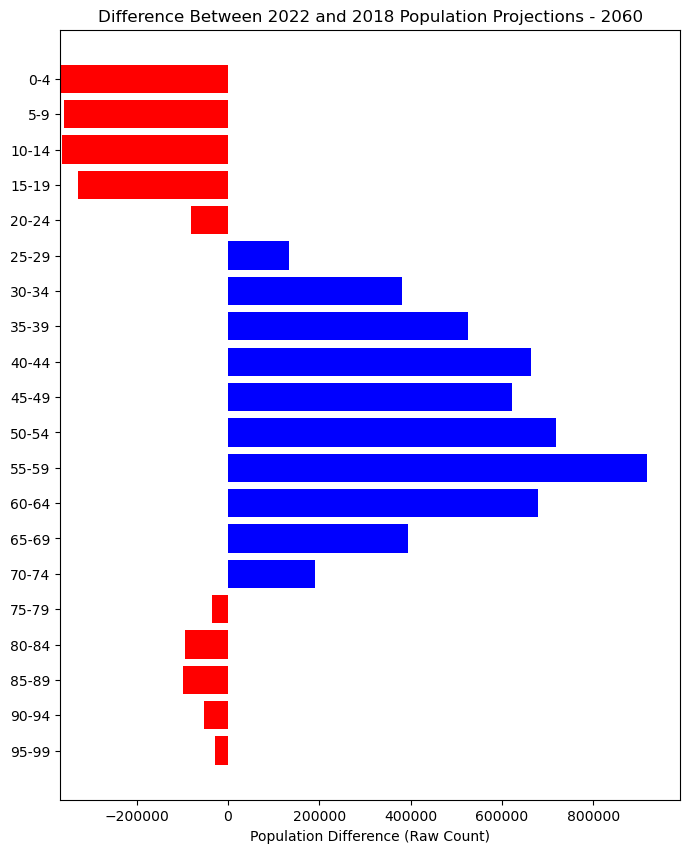

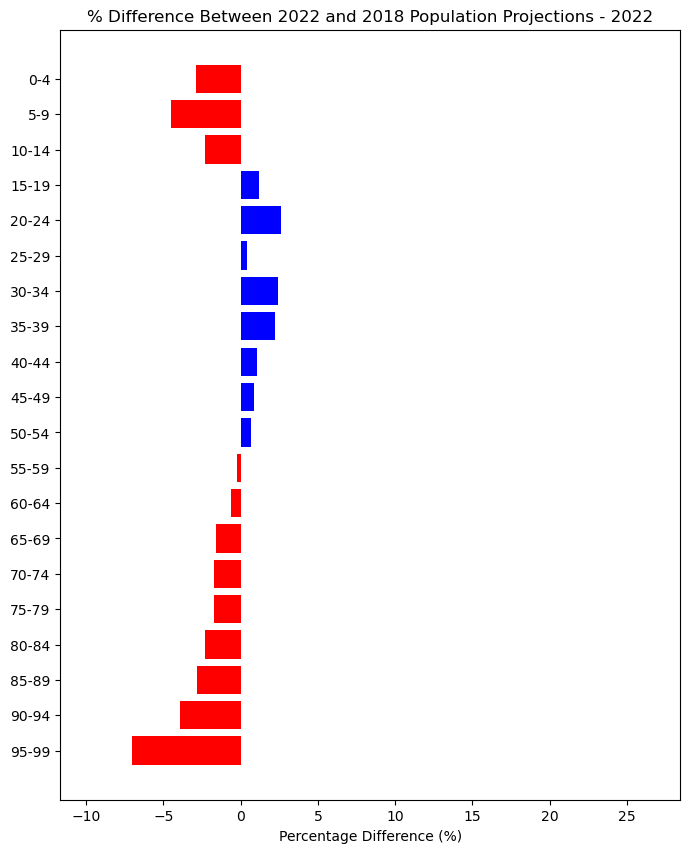

In [44]:
# Filter data for "persons" only
df_persons = df_difference[df_difference["Sex"] == "persons"]

# Get unique years and age groups
years = sorted(df_persons["Year"].unique())
ages = df_persons["Age"].unique()

# Determine fixed x-axis limits for Population Difference and Percentage Difference
population_diff_min = df_persons["Population_Difference"].min()
population_diff_max = df_persons["Population_Difference"].max()
percentage_diff_min = df_persons["Percentage_Change"].min()
percentage_diff_max = df_persons["Percentage_Change"].max()

# Create a function to update the chart for Population Difference
def update_population(frame):
    year = years[frame]
    ax.clear()
    
    # Filter data for the current year
    df_year = df_persons[df_persons["Year"] == year].set_index("Age")
    population_difference = df_year["Population_Difference"].values
    
    # Plot the data
    ax.barh(ages, population_difference, color=["blue" if v >= 0 else "red" for v in population_difference])
    ax.set_xlim(population_diff_min, population_diff_max)  # Fixed axis
    ax.set_xlabel("Population Difference (Raw Count)")
    ax.set_title(f"Difference Between 2022 and 2018 Population Projections - {year}")
    plt.gca().invert_yaxis()  # Younger ages at the bottom

# Create the Population Difference animation
fig, ax = plt.subplots(figsize=(8, 10))
ani_population = animation.FuncAnimation(fig, update_population, frames=len(years), repeat=True, interval=300)

# Save the Population Difference animation
ani_population.save("population_difference_animation_fixed.mp4", writer="ffmpeg", fps=5)

# Create a function to update the chart for Percentage Difference
def update_percentage(frame):
    year = years[frame]
    ax.clear()
    
    # Filter data for the current year
    df_year = df_persons[df_persons["Year"] == year].set_index("Age")
    percentage_difference = df_year["Percentage_Change"].values
    
    # Plot the data
    ax.barh(ages, percentage_difference, color=["blue" if v >= 0 else "red" for v in percentage_difference])
    ax.set_xlim(percentage_diff_min, percentage_diff_max)  # Fixed axis
    ax.set_xlabel("Percentage Difference (%)")
    ax.set_title(f"% Difference Between 2022 and 2018 Population Projections - {year}")
    plt.gca().invert_yaxis()  # Younger ages at the bottom

# Create the Percentage Difference animation
fig, ax = plt.subplots(figsize=(8, 10))
ani_percentage = animation.FuncAnimation(fig, update_percentage, frames=len(years), repeat=True, interval=300)

# Save the Percentage Difference animation
ani_percentage.save("percentage_difference_animation_fixed.mp4", writer="ffmpeg", fps=5)

print("Animations saved as 'population_difference_animation_fixed.mp4' and 'percentage_difference_animation_fixed.mp4'")

In [ ]:
Difference Between 2022 and 2018 Population Projections